In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primeira parte

## Carregando os dados

In [2]:
# Extraindo os dados dos arquivos CSV
data_pathA = 'HW2_ex1_dataA.csv'
dfA = pd.read_csv(data_pathA)

data_pathB = 'HW2_ex1_dataB.csv'
dfB = pd.read_csv(data_pathB)

In [3]:
# Criando arrays para armazenar os dados
timeA = dfA.iloc[:, 0].values
yA = dfA.iloc[:, 1].values

# Mesma lógica para o conjunto B
timeB = dfB.iloc[:, 0].values
yB = dfB.iloc[:, 1].values

## Plotagem dos gráficos

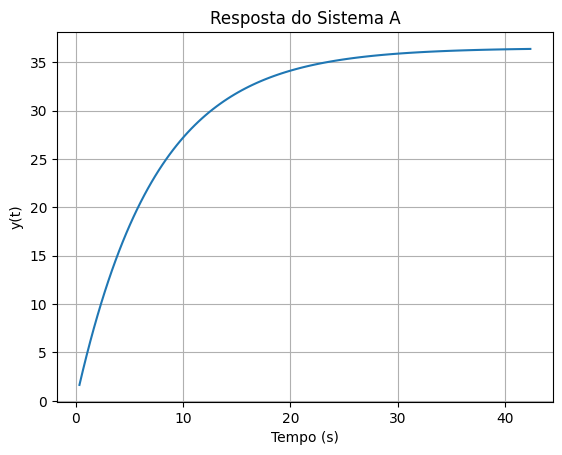

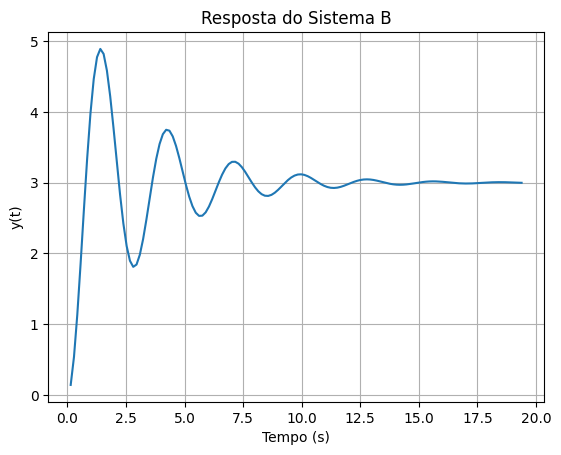

In [4]:
plt.plot(timeA, yA)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta do Sistema A')
plt.grid(True)

plt.show()

plt.plot(timeB, yB)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta do Sistema B')   
plt.grid(True) 

plt.show()
  

# Segunda parte


## Sistema A

In [9]:
'''Podemos inferir pelo gráfico que o sistema A trata-se de um sistema de primeira ordem. '''

# A constante de tempo pode ser encontrada onde o gráfico atinge 63% do valor final, para encontrar esse valor:
# yA_final = yA[-1]
tauA = timeA[np.where(yA >= 0.63 * yA[-1])[0][0]]
print(f"Constante de tempo do sistema A: {tauA.item():.2f}s")

# Para encontrar o tempo de acomodação:
tA = timeA[np.where(yA >= 0.98 * yA[-1])[0][0]]
print(f"Tempo de acomodação do sistema A: {tA.item():.2f}s")

# Para encontrar o tempo de subida:
tRiseA = timeA[np.where(yA >= 0.9 * yA[-1])[0][0]] - timeA[np.where(yA >= 0.1 * yA[-1])[0][0]]
print(f"Tempo de subida do sistema A: {tRiseA.item():.2f}s")

# Para encontrar o tempo de pico:
tPeakA = timeA[np.where(yA == yA.max())[0][0]]
print(f"Tempo de pico do sistema A: {tPeakA.item():.2f}s")

# Para encontrar o overshoot:
overshootA = (yA.max() - yA[-1]) / yA[-1]
print(f"Overshoot do sistema A: {overshootA.item():.2%}")

# Para encontrar o ganho:
gainA = yA[-1]
print(f"Ganho do sistema A: {gainA:.2f}")

Constante de tempo do sistema A: 7.40s
Tempo de acomodação do sistema A: 27.57s
Tempo de subida do sistema A: 15.80s
Tempo de pico do sistema A: 42.36s
Overshoot do sistema A: 0.00%
Ganho do sistema A: 36.39


## Sistema B

In [10]:
'''Podenos inferir pelo gráfico que o sistema B trata-se de um sistema de segunda ordem. Mais especificamente, um sistema subamortecido, pois o gráfico apresenta oscilações
e um posterior amortecimento.'''

# yB_final = yB[-1]

# Para encontrar o tempo de pico:
tPeakB = timeB[np.where(yB == yB.max())[0][0]]

# Para encontrar o overshoot:
overshootB = (yB.max() - yB[-1]) / yB[-1]


# A constante de tempo de um sistema de segunda ordem é encontrada de maneira diferente, para encontrar esse valor precisamos encontrar o zeta e o ômega natural do sistema.
# Para isso, vamos usar a relação entre o overshoot e a constante de tempo :
zetaB = -np.log(overshootB) / (np.sqrt(np.pi**2 + np.log(overshootB)**2))
omegaB = np.pi / (tPeakB * np.sqrt(1 - zetaB**2)) 
tauB = 1 / (zetaB * omegaB)
print(f"Constante de tempo do sistema B: {tauB:.2f}s")

# Para encontrar o tempo de acomodação:
tB = 4 * tauB
print(f"Tempo de acomodação do sistema B: {tB:.2f}s")

# Para encontrar o tempo de subida:
tRiseB = timeB[np.where(yB >= 0.9 * yB[-1])[0][0]] - timeB[np.where(yB >= 0.1 * yB[-1])[0][0]]
print(f"Tempo de subida do sistema B: {tRiseB.item():.2f}s")    

print(f"Tempo de pico do sistema B: {tPeakB.item():.2f}s")

print(f"Overshoot do sistema B: {overshootB.item():.2%}")

print(f"Frequência natural do sistema B: {omegaB:.2f} rad/s")

print(f"Taxa de amortecimento do sistema B: {zetaB:.2f}")

# Para encontrar o ganho:
gainB = yB[-1]
print(f"Ganho do sistema B: {gainB:.2f}")


Constante de tempo do sistema B: 3.05s
Tempo de acomodação do sistema B: 12.20s
Tempo de subida do sistema B: 0.56s
Tempo de pico do sistema B: 1.41s
Overshoot do sistema B: 63.09%
Frequência natural do sistema B: 2.26 rad/s
Taxa de amortecimento do sistema B: 0.15
Ganho do sistema B: 3.00


# Terceira parte

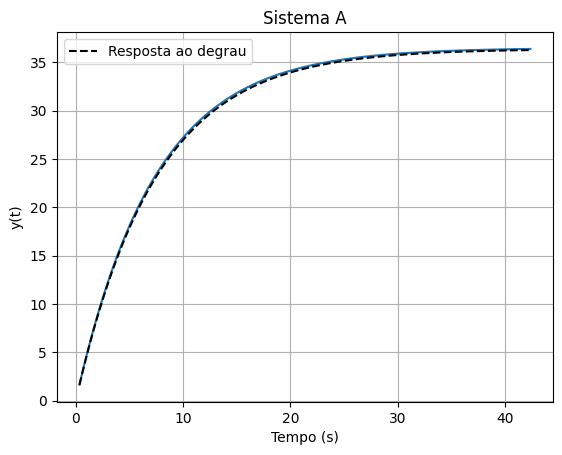

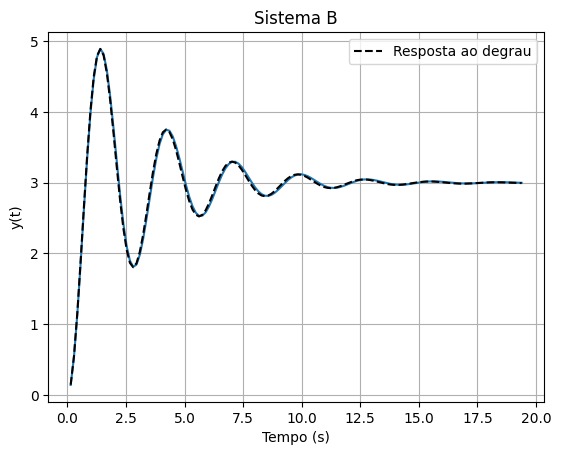

In [16]:
# Repetindo os gráficos da primeira parte com o conjunto de dados, agora com a resposta ao degrau das funções de transferência

# Após aplicar a transformada inversa de Laplace para obter a resposta ao degrau, para obter a resposta equivalente precisamos multiplicar a resposta ao degrau pelo ganho do sistema.
# Para o sistema A, o ganho é o valor final, então a resposta ao degrau é:
y_degA = (1 - np.exp(-timeA / tauA)) * yA[-1]
y_degA_teorico = 36.39*(1 - np.exp(-timeA /7.40))

plt.plot(timeA, yA)
plt.plot(timeA, y_degA, linestyle='--', color='black', label='Resposta ao degrau')
#plt.plot(timeA, y_degA_teorico, linestyle='--', color='red', label='Resposta ao degrau teórica')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Sistema A')
plt.grid(True)
plt.legend()
plt.show()

# Repetindo o mesmo processo para o sistema B
# Precisamos multiplicar a resposta ao degrau pelo ganho do sistema, que é o valor final.
#yB_final = yB[-1]
y_degB = yB[-1] * (1 - np.exp(-zetaB * omegaB * timeB) * (np.cos(omegaB * np.sqrt(1 - zetaB**2) * timeB) + zetaB / np.sqrt(1 - zetaB**2) * np.sin(omegaB * np.sqrt(1 - zetaB**2) * timeB)))
y_degB_teorico = 3*(1 - (np.exp(-0.34*timeB)/0.989)*np.sin(2.23*timeB + 1.42))

plt.plot(timeB, yB)
plt.plot(timeB, y_degB, linestyle='--', color='black', label='Resposta ao degrau')
#plt.plot(timeB, y_degB_teorico, linestyle='--', color='red', label='Resposta ao degrau teórica')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Sistema B')   
plt.grid(True) 
plt.legend()
plt.show()